<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Algoritmos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [12]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [40]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

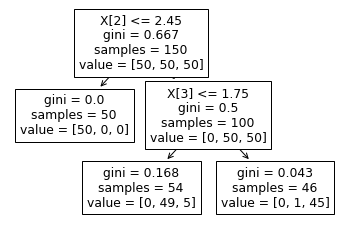

In [41]:
tree.plot_tree(clf)

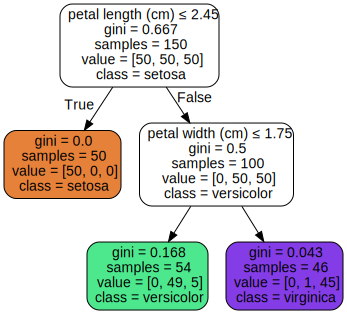

In [42]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# nesse caso caso uma folha tenha 5 cm de comprimento e 1.5cm de largura, teremos 90% de chance dela pertencer a classe versicolor

## Ensemble Learning

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [49]:
%%time
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X, y)

CPU times: user 312 ms, sys: 316 µs, total: 312 ms
Wall time: 327 ms


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [15]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X, y)
  y_pred = clf.predict(X)
  print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9933333333333333
SVC 0.9533333333333334
VotingClassifier 0.9666666666666667


In [23]:
from sklearn.ensemble import BaggingClassifier

In [48]:
%%time
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap= True, n_jobs = -1)
bag_clf.fit(X,y)
y_pred = bag_clf.predict(X)

CPU times: user 265 ms, sys: 29.4 ms, total: 294 ms
Wall time: 3.71 s


In [46]:
bag_clf.score(X, y_pred)

1.0

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
%%time
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)

CPU times: user 1.4 s, sys: 30 ms, total: 1.43 s
Wall time: 2.16 s


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [41]:
y_pred_rf = rnd_clf.predict(X) 

In [45]:
print(accuracy_score(y, y_pred_rf))

0.9933333333333333
